In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import datetime

In [5]:
# downloaded 4 most recent MTA turnstile data sets, read in files and combine into one file
df1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190921.txt')
df2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190914.txt')
df3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190907.txt')
df4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190831.txt')
df = pd.concat([df1, df2, df3, df4])

In [6]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,00:00:00,REGULAR,7198818,2438323
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,04:00:00,REGULAR,7198834,2438325
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,08:00:00,REGULAR,7198847,2438354
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,12:00:00,REGULAR,7198929,2438428
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,16:00:00,REGULAR,7199125,2438483


In [7]:
#creates keys
df['UNIQUE_ID'] = df['C/A'] + df['UNIT'] + df['SCP'] + df['STATION']

In [8]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,UNIQUE_ID
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,00:00:00,REGULAR,7198818,2438323,A002R05102-00-0059 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,04:00:00,REGULAR,7198834,2438325,A002R05102-00-0059 ST
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,08:00:00,REGULAR,7198847,2438354,A002R05102-00-0059 ST
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,12:00:00,REGULAR,7198929,2438428,A002R05102-00-0059 ST
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,16:00:00,REGULAR,7199125,2438483,A002R05102-00-0059 ST


In [9]:
#create datetime column
df['DATE_TIME'] = pd.to_datetime(df['DATE'] + " " + df['TIME'], format="%m/%d/%Y %H:%M:%S")

#creates day of week column
df['WEEKDAY'] = df['DATE_TIME'].dt.weekday_name

#creates week number column
df['WEEK'] = df['DATE_TIME'].dt.week

In [10]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,UNIQUE_ID,DATE_TIME,WEEKDAY,WEEK
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,00:00:00,REGULAR,7198818,2438323,A002R05102-00-0059 ST,2019-09-14 00:00:00,Saturday,37
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,04:00:00,REGULAR,7198834,2438325,A002R05102-00-0059 ST,2019-09-14 04:00:00,Saturday,37
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,08:00:00,REGULAR,7198847,2438354,A002R05102-00-0059 ST,2019-09-14 08:00:00,Saturday,37
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,12:00:00,REGULAR,7198929,2438428,A002R05102-00-0059 ST,2019-09-14 12:00:00,Saturday,37
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,16:00:00,REGULAR,7199125,2438483,A002R05102-00-0059 ST,2019-09-14 16:00:00,Saturday,37


In [11]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'UNIQUE_ID', 'DATE_TIME', 'WEEKDAY', 'WEEK'],
      dtype='object')

In [12]:
df.columns = df.columns.str.strip()
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'UNIQUE_ID', 'DATE_TIME', 'WEEKDAY',
       'WEEK'],
      dtype='object')

In [13]:
# Looking for duplicates.
df_duplicates = df.groupby(["UNIQUE_ID", "DATE", "TIME"])["ENTRIES"].count().reset_index().sort_values("ENTRIES").tail()
df_duplicates

,UNIQUE_ID,DATE,TIME,ENTRIES
511561,R101R00102-00-04SOUTH FERRY,09/17/2019,05:00:00,2
143593,H039R37500-00-00NEW LOTS,09/13/2019,05:00:00,2
567650,R161AR45201-00-0272 ST,08/26/2019,21:00:00,2
512065,R101R00102-00-07SOUTH FERRY,09/17/2019,05:00:00,2
143761,H039R37500-00-01NEW LOTS,09/13/2019,05:00:00,2


In [14]:
# Removing duplicates.
df.sort_values(["UNIQUE_ID", "DATE_TIME"], inplace=True, ascending=False)
df.drop_duplicates(subset=["UNIQUE_ID", "DATE_TIME"], inplace=True)

In [15]:
df_duplicates = df.groupby(["UNIQUE_ID", "DATE", "TIME"])["ENTRIES"].count().reset_index().sort_values("ENTRIES").tail()
df_duplicates

,UNIQUE_ID,DATE,TIME,ENTRIES
273524,N135R38501-03-01ROCKAWAY BLVD,09/08/2019,13:00:00,1
273525,N135R38501-03-01ROCKAWAY BLVD,09/08/2019,17:00:00,1
273526,N135R38501-03-01ROCKAWAY BLVD,09/08/2019,21:00:00,1
273516,N135R38501-03-01ROCKAWAY BLVD,09/07/2019,05:00:00,1
820565,TRAM2R46900-05-01RIT-ROOSEVELT,09/20/2019,21:00:00,1


In [16]:
df= df.sort_values(["UNIQUE_ID", "DATE_TIME"])
df["ENTRY_DIFF"] = df.groupby("UNIQUE_ID")["ENTRIES"].diff()

In [17]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,UNIQUE_ID,DATE_TIME,WEEKDAY,WEEK,ENTRY_DIFF
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/24/2019,00:00:00,REGULAR,7176756,2430372,A002R05102-00-0059 ST,2019-08-24 00:00:00,Saturday,34,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/24/2019,04:00:00,REGULAR,7176772,2430375,A002R05102-00-0059 ST,2019-08-24 04:00:00,Saturday,34,16.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/24/2019,08:00:00,REGULAR,7176786,2430408,A002R05102-00-0059 ST,2019-08-24 08:00:00,Saturday,34,14.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/24/2019,12:00:00,REGULAR,7176862,2430481,A002R05102-00-0059 ST,2019-08-24 12:00:00,Saturday,34,76.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/24/2019,16:00:00,REGULAR,7177008,2430520,A002R05102-00-0059 ST,2019-08-24 16:00:00,Saturday,34,146.0


In [18]:
df.describe()

,ENTRIES,EXITS,WEEK,ENTRY_DIFF
count,8.205660e+05,8.205660e+05,820566.000000,8.156370e+05
mean,4.223520e+07,3.493386e+07,36.214547,6.565492e+02
std,2.159517e+08,1.998297e+08,1.205872,1.504259e+06
min,0.000000e+00,0.000000e+00,34.000000,-9.915396e+08
25%,2.852252e+05,1.266178e+05,35.000000,8.000000e+00
50%,2.054911e+06,1.178052e+06,36.000000,6.900000e+01
75%,6.632682e+06,4.546158e+06,37.000000,2.280000e+02
max,2.129132e+09,2.123825e+09,38.000000,7.185607e+08


In [19]:
# Drop negative values
mta_df = df[(df["ENTRY_DIFF"] >= 0 )]

In [20]:
# Removing high values
mta_df = mta_df[(mta_df.ENTRY_DIFF < 20000)]
mta_df.describe()

,ENTRIES,EXITS,WEEK,ENTRY_DIFF
count,8.082250e+05,8.082250e+05,808225.000000,808225.000000
mean,3.130163e+07,2.501678e+07,36.227812,168.817489
std,1.737428e+08,1.601598e+08,1.197216,246.203858
min,0.000000e+00,0.000000e+00,34.000000,0.000000
25%,2.771620e+05,1.235140e+05,35.000000,9.000000
50%,1.983244e+06,1.142104e+06,36.000000,71.000000
75%,6.448077e+06,4.384343e+06,37.000000,231.000000
max,2.115935e+09,2.062319e+09,38.000000,15445.000000


In [21]:
mta_df1 = mta_df.groupby(['C/A', 'UNIT','STATION','DATE'])["ENTRY_DIFF"].sum().reset_index()
mta_df1.head(20)

,C/A,UNIT,STATION,DATE,ENTRY_DIFF
0,A002,R051,59 ST,08/24/2019,6506.0
1,A002,R051,59 ST,08/25/2019,7123.0
2,A002,R051,59 ST,08/26/2019,11272.0
3,A002,R051,59 ST,08/27/2019,12044.0
4,A002,R051,59 ST,08/28/2019,12093.0
5,A002,R051,59 ST,08/29/2019,11783.0
6,A002,R051,59 ST,08/30/2019,11543.0
7,A002,R051,59 ST,08/31/2019,7835.0
8,A002,R051,59 ST,09/01/2019,6978.0
9,A002,R051,59 ST,09/02/2019,6241.0


In [22]:
mta_df2 = mta_df1.groupby('STATION')['ENTRY_DIFF'].sum().reset_index().sort_values('ENTRY_DIFF', ascending=False)
mta_df2.head(10)

,STATION,ENTRY_DIFF
61,34 ST-PENN STA,3824644.0
232,GRD CNTRL-42 ST,3248602.0
59,34 ST-HERALD SQ,2825905.0
46,23 ST,2703057.0
14,14 ST-UNION SQ,2444762.0
352,TIMES SQ-42 ST,2343383.0
225,FULTON ST,2282185.0
68,42 ST-PORT AUTH,2233602.0
110,86 ST,2006703.0
9,125 ST,1906087.0


In [109]:
mta_df3 = mta_df2.head(5)
mta_df3
mta_df2.head(20).to_csv("topstations.csv")

In [66]:
mta_df_1 = mta_df.groupby(['WEEKDAY','STATION'], as_index = False)[['ENTRY_DIFF']].sum().sort_values('WEEKDAY')
mta_df_1.head()

,WEEKDAY,STATION,ENTRY_DIFF
0,Friday,1 AV,73234.0
257,Friday,JOURNAL SQUARE,118436.0
256,Friday,JKSN HT-ROOSVLT,204843.0
255,Friday,JFK JAMAICA CT1,49783.0
254,Friday,JEFFERSON ST,30562.0


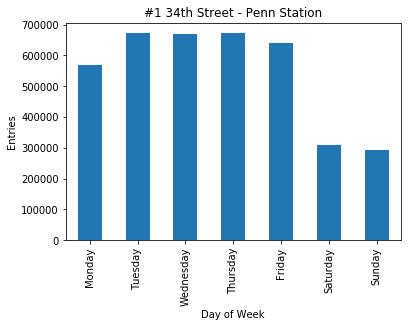

In [67]:
mta_df_TOP1 = mta_df_1[mta_df_1['STATION'] == '34 ST-PENN STA']
field = "WEEKDAY"
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax1 = mta_df_TOP1.set_index("WEEKDAY").loc[day_order].plot(kind="bar", legend=False)
ax1.set_ylabel("Entries")
ax1.set_xlabel("Day of Week")
plt.title("#1 34th Street - Penn Station")
ax1.figure.savefig('STPENNSTA_byday.svg', bbox_inches = 'tight')

In [68]:
mta_df_TOP1

,WEEKDAY,STATION,ENTRY_DIFF
61,Friday,34 ST-PENN STA,640123.0
439,Monday,34 ST-PENN STA,569820.0
817,Saturday,34 ST-PENN STA,309218.0
1195,Sunday,34 ST-PENN STA,293329.0
1573,Thursday,34 ST-PENN STA,671369.0
1951,Tuesday,34 ST-PENN STA,671774.0
2329,Wednesday,34 ST-PENN STA,669011.0


(0, 700000)

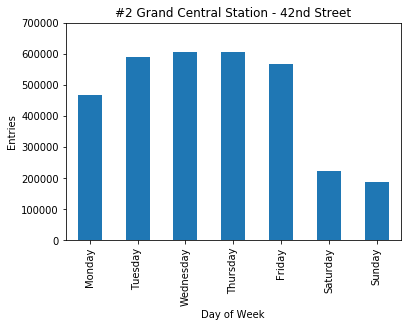

In [69]:
mta_df_TOP1 = mta_df_1[mta_df_1['STATION'] == 'GRD CNTRL-42 ST']
field = "WEEKDAY"
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax = mta_df_TOP1.set_index("WEEKDAY").loc[day_order].plot(kind="bar", legend=False)
ax.set_ylabel("Entries")
ax.set_xlabel("Day of Week")
plt.title("#2 Grand Central Station - 42nd Street")
plt.ylim([0, 700000])
#ax.figure.savefig('GrandCentral_byday.svg', bbox_inches = 'tight')

(0, 700000)

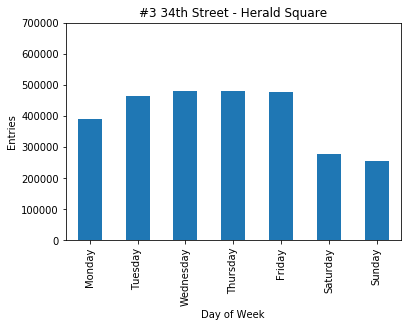

In [70]:
mta_df_TOP3 = mta_df_1[mta_df_1['STATION'] == '34 ST-HERALD SQ']
field = "WEEKDAY"
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax = mta_df_TOP3.set_index("WEEKDAY").loc[day_order].plot(kind="bar", legend=False)
ax.set_ylabel("Entries")
ax.set_xlabel("Day of Week")
plt.title("#3 34th Street - Herald Square")
plt.ylim([0, 700000])
#ax.figure.savefig('HeraldSq_byday.svg', bbox_inches = 'tight')

In [71]:
mta_df_TOP3

,WEEKDAY,STATION,ENTRY_DIFF
59,Friday,34 ST-HERALD SQ,476270.0
437,Monday,34 ST-HERALD SQ,391241.0
815,Saturday,34 ST-HERALD SQ,278646.0
1193,Sunday,34 ST-HERALD SQ,254518.0
1571,Thursday,34 ST-HERALD SQ,479184.0
1949,Tuesday,34 ST-HERALD SQ,465693.0
2327,Wednesday,34 ST-HERALD SQ,480353.0


(0, 700000)

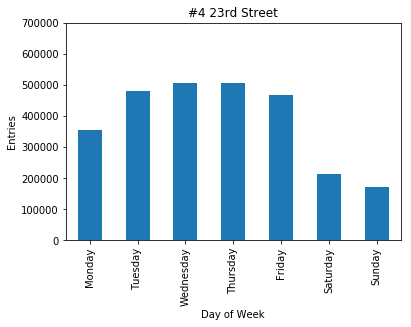

In [72]:
mta_df_TOP4 = mta_df_1[mta_df_1['STATION'] == '23 ST']
field = "WEEKDAY"
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax = mta_df_TOP4.set_index("WEEKDAY").loc[day_order].plot(kind="bar", legend=False)
ax.set_ylabel("Entries")
ax.set_xlabel("Day of Week")
plt.title("#4 23rd Street")
plt.ylim([0, 700000])
#ax.figure.savefig('23ST', bbox_inches = 'tight')

In [73]:
mta_df_TOP4

,WEEKDAY,STATION,ENTRY_DIFF
46,Friday,23 ST,467363.0
424,Monday,23 ST,356192.0
802,Saturday,23 ST,213444.0
1180,Sunday,23 ST,171892.0
1558,Thursday,23 ST,507544.0
1936,Tuesday,23 ST,480978.0
2314,Wednesday,23 ST,505644.0


(0, 700000)

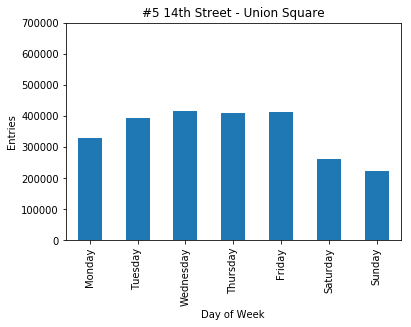

In [74]:
mta_df_TOP5 = mta_df_1[mta_df_1['STATION'] == '14 ST-UNION SQ']
field = "WEEKDAY"
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax = mta_df_TOP5.set_index("WEEKDAY").loc[day_order].plot(kind="bar", legend=False)
ax.set_ylabel("Entries")
ax.set_xlabel("Day of Week")
plt.title("#5 14th Street - Union Square")
plt.ylim([0, 700000])
#ax.figure.savefig('14StUnion', bbox_inches = 'tight')

In [75]:
mta_df_TOP5

,WEEKDAY,STATION,ENTRY_DIFF
14,Friday,14 ST-UNION SQ,412437.0
392,Monday,14 ST-UNION SQ,327946.0
770,Saturday,14 ST-UNION SQ,262151.0
1148,Sunday,14 ST-UNION SQ,222183.0
1526,Thursday,14 ST-UNION SQ,409830.0
1904,Tuesday,14 ST-UNION SQ,394688.0
2282,Wednesday,14 ST-UNION SQ,415527.0


In [76]:
mta_df_2 = mta_df.groupby(['WEEKDAY','STATION','TIME'], as_index = False)[['ENTRY_DIFF']].sum()
mta_df_2.head()

,WEEKDAY,STATION,TIME,ENTRY_DIFF
0,Friday,1 AV,00:00:00,9303.0
1,Friday,1 AV,04:00:00,1243.0
2,Friday,1 AV,08:00:00,4966.0
3,Friday,1 AV,12:00:00,17180.0
4,Friday,1 AV,16:00:00,18141.0


In [77]:
mta_df_TOP1_time = mta_df_2[mta_df_2['STATION'] == '34 ST-PENN STA']
mta_df_TOP1_time_Tues = mta_df_TOP1_time[mta_df_TOP1_time['WEEKDAY'] == 'Tuesday'] 
mta_df_TOP1_time_Wed = mta_df_TOP1_time[mta_df_TOP1_time['WEEKDAY'] == 'Wednesday'] 
mta_df_TOP1_time_Thurs = mta_df_TOP1_time[mta_df_TOP1_time['WEEKDAY'] == 'Thursday']
mta_df_TOP1_time_Fri = mta_df_TOP1_time[mta_df_TOP1_time['WEEKDAY'] == 'Friday']

In [78]:
mod_mta_df_TOP1_time_Thurs = mta_df_TOP1_time_Thurs.drop(mta_df_TOP1_time_Thurs.index[[7]])

In [79]:
mod_mta_df_TOP1_time_Fri = mta_df_TOP1_time_Fri.drop(mta_df_TOP1_time_Fri.index[[4]])

(0, 225000)

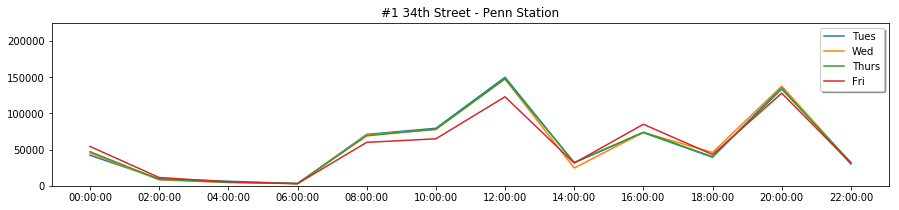

In [80]:
plt.figure(figsize=(15,3))
plt.plot(mta_df_TOP1_time_Tues['TIME'],mta_df_TOP1_time_Tues['ENTRY_DIFF'],label='Tues')
plt.plot(mta_df_TOP1_time_Wed['TIME'],mta_df_TOP1_time_Wed['ENTRY_DIFF'],label='Wed')
plt.plot(mod_mta_df_TOP1_time_Thurs['TIME'],mod_mta_df_TOP1_time_Thurs['ENTRY_DIFF'],label='Thurs')
plt.plot(mod_mta_df_TOP1_time_Fri['TIME'],mod_mta_df_TOP1_time_Fri['ENTRY_DIFF'],label='Fri')
plt.title("#1 34th Street - Penn Station")
plt.legend(['Tues','Wed','Thurs','Fri'],shadow = True, loc = 0);
plt.ylim([0, 225000])
#plt.savefig("PennSt_time.svg")

In [81]:
mta_df_TOP1_time_Fri

,WEEKDAY,STATION,TIME,ENTRY_DIFF
633,Friday,34 ST-PENN STA,00:00:00,54319.0
634,Friday,34 ST-PENN STA,02:00:00,11429.0
635,Friday,34 ST-PENN STA,04:00:00,5367.0
636,Friday,34 ST-PENN STA,06:00:00,2998.0
637,Friday,34 ST-PENN STA,07:51:58,80.0
638,Friday,34 ST-PENN STA,08:00:00,59948.0
639,Friday,34 ST-PENN STA,10:00:00,64821.0
640,Friday,34 ST-PENN STA,12:00:00,122817.0
641,Friday,34 ST-PENN STA,14:00:00,31362.0
642,Friday,34 ST-PENN STA,16:00:00,84883.0


In [82]:
mod_mta_df_TOP1_time_Fri

,WEEKDAY,STATION,TIME,ENTRY_DIFF
633,Friday,34 ST-PENN STA,00:00:00,54319.0
634,Friday,34 ST-PENN STA,02:00:00,11429.0
635,Friday,34 ST-PENN STA,04:00:00,5367.0
636,Friday,34 ST-PENN STA,06:00:00,2998.0
638,Friday,34 ST-PENN STA,08:00:00,59948.0
639,Friday,34 ST-PENN STA,10:00:00,64821.0
640,Friday,34 ST-PENN STA,12:00:00,122817.0
641,Friday,34 ST-PENN STA,14:00:00,31362.0
642,Friday,34 ST-PENN STA,16:00:00,84883.0
643,Friday,34 ST-PENN STA,18:00:00,43154.0


In [83]:
mta_df_TOP2_time = mta_df_2[mta_df_2['STATION'] == 'GRD CNTRL-42 ST']
mta_df_TOP2_time_Tues = mta_df_TOP2_time[mta_df_TOP2_time['WEEKDAY'] == 'Tuesday'] 
mta_df_TOP2_time_Wed = mta_df_TOP2_time[mta_df_TOP2_time['WEEKDAY'] == 'Wednesday'] 
mta_df_TOP2_time_Thurs = mta_df_TOP2_time[mta_df_TOP2_time['WEEKDAY'] == 'Thursday']
mta_df_TOP2_time_Fri = mta_df_TOP2_time[mta_df_TOP2_time['WEEKDAY'] == 'Friday']

In [84]:
mod_mta_df_TOP2_time_Tues = mta_df_TOP2_time_Tues.drop(mta_df_TOP2_time_Tues.index[[6,7,8,9,10,11,12,13,14,15,16,17,18,20]])

In [85]:
mta_df_TOP2_time_Tues

,WEEKDAY,STATION,TIME,ENTRY_DIFF
38775,Tuesday,GRD CNTRL-42 ST,00:00:00,24212.0
38776,Tuesday,GRD CNTRL-42 ST,01:00:00,13659.0
38777,Tuesday,GRD CNTRL-42 ST,04:00:00,3252.0
38778,Tuesday,GRD CNTRL-42 ST,05:00:00,1017.0
38779,Tuesday,GRD CNTRL-42 ST,08:00:00,25751.0
38780,Tuesday,GRD CNTRL-42 ST,09:00:00,36364.0
38781,Tuesday,GRD CNTRL-42 ST,10:41:17,4842.0
38782,Tuesday,GRD CNTRL-42 ST,10:41:37,793.0
38783,Tuesday,GRD CNTRL-42 ST,11:14:24,113.0
38784,Tuesday,GRD CNTRL-42 ST,11:14:25,2380.0


In [86]:
mod_mta_df_TOP2_time_Tues

,WEEKDAY,STATION,TIME,ENTRY_DIFF
38775,Tuesday,GRD CNTRL-42 ST,00:00:00,24212.0
38776,Tuesday,GRD CNTRL-42 ST,01:00:00,13659.0
38777,Tuesday,GRD CNTRL-42 ST,04:00:00,3252.0
38778,Tuesday,GRD CNTRL-42 ST,05:00:00,1017.0
38779,Tuesday,GRD CNTRL-42 ST,08:00:00,25751.0
38780,Tuesday,GRD CNTRL-42 ST,09:00:00,36364.0
38794,Tuesday,GRD CNTRL-42 ST,12:00:00,68248.0
38796,Tuesday,GRD CNTRL-42 ST,13:00:00,35927.0
38797,Tuesday,GRD CNTRL-42 ST,16:00:00,50627.0
38798,Tuesday,GRD CNTRL-42 ST,17:00:00,72302.0


(0, 225000)

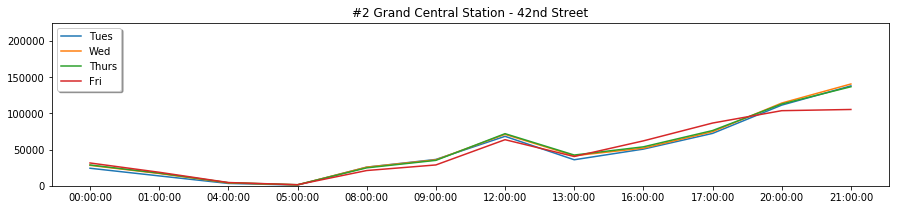

In [87]:
plt.figure(figsize=(15,3))
plt.plot(mod_mta_df_TOP2_time_Tues['TIME'],mod_mta_df_TOP2_time_Tues['ENTRY_DIFF'])
plt.plot(mta_df_TOP2_time_Wed['TIME'],mta_df_TOP2_time_Wed['ENTRY_DIFF'])
plt.plot(mta_df_TOP2_time_Thurs['TIME'],mta_df_TOP2_time_Thurs['ENTRY_DIFF'])
plt.plot(mta_df_TOP2_time_Fri['TIME'],mta_df_TOP2_time_Fri['ENTRY_DIFF'])
plt.title("#2 Grand Central Station - 42nd Street")
plt.legend(['Tues','Wed','Thurs','Fri'],shadow = True, loc = 0);
plt.ylim([0, 225000])
#plt.savefig("GrandCentral_time.svg")

In [88]:
mta_df_TOP3_time = mta_df_2[mta_df_2['STATION'] == '34 ST-HERALD SQ']
mta_df_TOP3_time_Tues = mta_df_TOP3_time[mta_df_TOP3_time['WEEKDAY'] == 'Tuesday'] 
mta_df_TOP3_time_Wed = mta_df_TOP3_time[mta_df_TOP3_time['WEEKDAY'] == 'Wednesday'] 
mta_df_TOP3_time_Thurs = mta_df_TOP3_time[mta_df_TOP3_time['WEEKDAY'] == 'Thursday']
mta_df_TOP3_time_Fri = mta_df_TOP3_time[mta_df_TOP3_time['WEEKDAY'] == 'Friday']

In [89]:
mta_df_TOP3_time_Wed

,WEEKDAY,STATION,TIME,ENTRY_DIFF
44164,Wednesday,34 ST-HERALD SQ,00:00:00,66912.0
44165,Wednesday,34 ST-HERALD SQ,04:00:00,8504.0
44166,Wednesday,34 ST-HERALD SQ,08:00:00,28016.0
44167,Wednesday,34 ST-HERALD SQ,08:12:00,276.0
44168,Wednesday,34 ST-HERALD SQ,08:12:18,483.0
44169,Wednesday,34 ST-HERALD SQ,08:14:07,44.0
44170,Wednesday,34 ST-HERALD SQ,08:15:39,439.0
44171,Wednesday,34 ST-HERALD SQ,08:55:18,634.0
44172,Wednesday,34 ST-HERALD SQ,12:00:00,84070.0
44173,Wednesday,34 ST-HERALD SQ,16:00:00,87408.0


In [90]:
mod_mta_df_TOP3_time_Wed

,WEEKDAY,STATION,TIME,ENTRY_DIFF
44164,Wednesday,34 ST-HERALD SQ,00:00:00,66912.0
44165,Wednesday,34 ST-HERALD SQ,04:00:00,8504.0
44166,Wednesday,34 ST-HERALD SQ,08:00:00,28016.0
44172,Wednesday,34 ST-HERALD SQ,12:00:00,84070.0
44173,Wednesday,34 ST-HERALD SQ,16:00:00,87408.0
44174,Wednesday,34 ST-HERALD SQ,20:00:00,203567.0


In [91]:
mod_mta_df_TOP3_time_Tues = mta_df_TOP3_time_Tues.drop(mta_df_TOP3_time_Tues.index[[2,3]])

In [92]:
mod_mta_df_TOP3_time_Wed = mta_df_TOP3_time_Wed.drop(mta_df_TOP3_time_Wed.index[[3,4,5,6,7]])

In [93]:
mod_mta_df_TOP3_time_Thurs = mta_df_TOP3_time_Thurs.drop(mta_df_TOP3_time_Thurs.index[[3]])

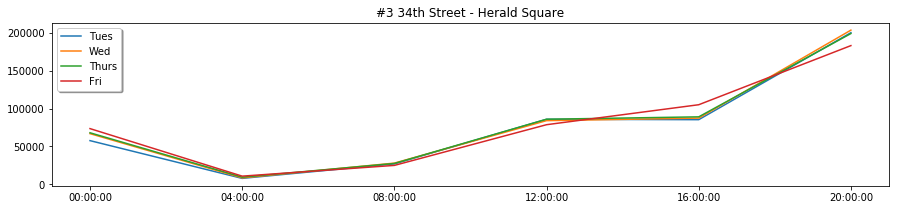

In [94]:
plt.figure(figsize=(15,3))
plt.plot(mod_mta_df_TOP3_time_Tues['TIME'],mod_mta_df_TOP3_time_Tues['ENTRY_DIFF'])
plt.plot(mod_mta_df_TOP3_time_Wed['TIME'],mod_mta_df_TOP3_time_Wed['ENTRY_DIFF'])
plt.plot(mod_mta_df_TOP3_time_Thurs['TIME'],mod_mta_df_TOP3_time_Thurs['ENTRY_DIFF'])
plt.plot(mta_df_TOP3_time_Fri['TIME'],mta_df_TOP3_time_Fri['ENTRY_DIFF'])
plt.title("#3 34th Street - Herald Square")
plt.legend(['Tues','Wed','Thurs','Fri'],shadow = True, loc = 0);
#plt.ylim([0, 225000])
#plt.savefig("Herald_time.svg")

In [95]:
mta_df_TOP4_time = mta_df_2[mta_df_2['STATION'] == '23 ST']
mta_df_TOP4_time_Tues = mta_df_TOP4_time[mta_df_TOP4_time['WEEKDAY'] == 'Tuesday'] 
mta_df_TOP4_time_Wed = mta_df_TOP4_time[mta_df_TOP4_time['WEEKDAY'] == 'Wednesday'] 
mta_df_TOP4_time_Thurs = mta_df_TOP4_time[mta_df_TOP4_time['WEEKDAY'] == 'Thursday']
mta_df_TOP4_time_Fri = mta_df_TOP4_time[mta_df_TOP4_time['WEEKDAY'] == 'Friday']

In [96]:
mta_df_TOP4_time_Tues

,WEEKDAY,STATION,TIME,ENTRY_DIFF
36673,Tuesday,23 ST,00:00:00,33145.0
36674,Tuesday,23 ST,01:00:00,16176.0
36675,Tuesday,23 ST,04:00:00,3044.0
36676,Tuesday,23 ST,05:00:00,933.0
36677,Tuesday,23 ST,06:26:11,17.0
36678,Tuesday,23 ST,08:00:00,10969.0
36679,Tuesday,23 ST,09:00:00,18806.0
36680,Tuesday,23 ST,09:48:07,398.0
36681,Tuesday,23 ST,09:51:00,284.0
36682,Tuesday,23 ST,12:00:00,51317.0


In [97]:
mod_mta_df_TOP4_time_Tues = mta_df_TOP4_time_Tues.drop(mta_df_TOP4_time_Tues.index[[4,7,8]])

In [98]:
mod_mta_df_TOP4_time_Wed = mta_df_TOP4_time_Wed.drop(mta_df_TOP4_time_Wed.index[[5,6]])

In [99]:
mod_mta_df_TOP4_time_Thurs = mta_df_TOP4_time_Thurs.drop(mta_df_TOP4_time_Thurs.index[[6]])

In [100]:
mod_mta_df_TOP4_time_Tues

,WEEKDAY,STATION,TIME,ENTRY_DIFF
36673,Tuesday,23 ST,00:00:00,33145.0
36674,Tuesday,23 ST,01:00:00,16176.0
36675,Tuesday,23 ST,04:00:00,3044.0
36676,Tuesday,23 ST,05:00:00,933.0
36678,Tuesday,23 ST,08:00:00,10969.0
36679,Tuesday,23 ST,09:00:00,18806.0
36682,Tuesday,23 ST,12:00:00,51317.0
36683,Tuesday,23 ST,13:00:00,31381.0
36684,Tuesday,23 ST,16:00:00,60683.0
36685,Tuesday,23 ST,17:00:00,49147.0


(0, 225000)

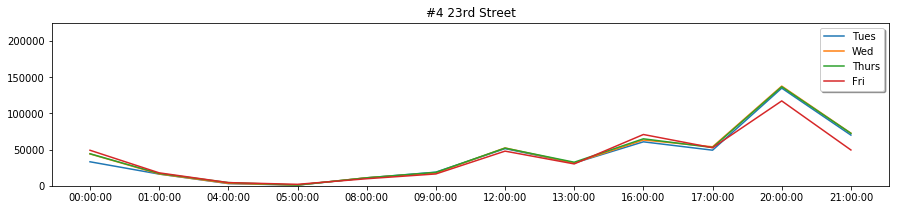

In [101]:
plt.figure(figsize=(15,3))
plt.plot(mod_mta_df_TOP4_time_Tues['TIME'],mod_mta_df_TOP4_time_Tues['ENTRY_DIFF'])
plt.plot(mod_mta_df_TOP4_time_Wed['TIME'],mod_mta_df_TOP4_time_Wed['ENTRY_DIFF'])
plt.plot(mod_mta_df_TOP4_time_Thurs['TIME'],mod_mta_df_TOP4_time_Thurs['ENTRY_DIFF'])
plt.plot(mta_df_TOP4_time_Fri['TIME'],mta_df_TOP4_time_Fri['ENTRY_DIFF'])
plt.title("#4 23rd Street")
plt.legend(['Tues','Wed','Thurs','Fri'],shadow = True, loc = 0);
plt.ylim([0, 225000])
#plt.savefig("23st_time.svg")

In [102]:
mta_df_TOP5_time = mta_df_2[mta_df_2['STATION'] == '14 ST-UNION SQ']
mta_df_TOP5_time_Tues = mta_df_TOP5_time[mta_df_TOP5_time['WEEKDAY'] == 'Tuesday'] 
mta_df_TOP5_time_Wed = mta_df_TOP5_time[mta_df_TOP5_time['WEEKDAY'] == 'Wednesday'] 
mta_df_TOP5_time_Thurs = mta_df_TOP5_time[mta_df_TOP5_time['WEEKDAY'] == 'Thursday']
mta_df_TOP5_time_Fri = mta_df_TOP5_time[mta_df_TOP5_time['WEEKDAY'] == 'Friday']

In [103]:
mta_df_TOP5_time_Tues

,WEEKDAY,STATION,TIME,ENTRY_DIFF
36252,Tuesday,14 ST-UNION SQ,01:00:00,41188.0
36253,Tuesday,14 ST-UNION SQ,05:00:00,3067.0
36254,Tuesday,14 ST-UNION SQ,07:36:15,164.0
36255,Tuesday,14 ST-UNION SQ,07:57:29,428.0
36256,Tuesday,14 ST-UNION SQ,09:00:00,32985.0
36257,Tuesday,14 ST-UNION SQ,13:00:00,50891.0
36258,Tuesday,14 ST-UNION SQ,17:00:00,107777.0
36259,Tuesday,14 ST-UNION SQ,21:00:00,158188.0


In [104]:
mod_mta_df_TOP5_time_Tues = mta_df_TOP5_time_Tues.drop(mta_df_TOP5_time_Tues.index[[2,3]])

In [105]:
mod_mta_df_TOP5_time_Tues

,WEEKDAY,STATION,TIME,ENTRY_DIFF
36252,Tuesday,14 ST-UNION SQ,01:00:00,41188.0
36253,Tuesday,14 ST-UNION SQ,05:00:00,3067.0
36256,Tuesday,14 ST-UNION SQ,09:00:00,32985.0
36257,Tuesday,14 ST-UNION SQ,13:00:00,50891.0
36258,Tuesday,14 ST-UNION SQ,17:00:00,107777.0
36259,Tuesday,14 ST-UNION SQ,21:00:00,158188.0


(0, 225000)

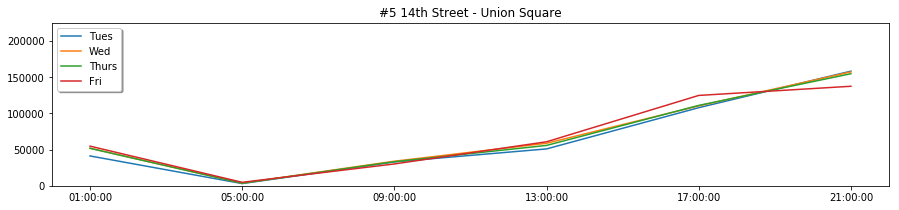

In [106]:
plt.figure(figsize=(15,3))
plt.plot(mod_mta_df_TOP5_time_Tues['TIME'],mod_mta_df_TOP5_time_Tues['ENTRY_DIFF'])
plt.plot(mta_df_TOP5_time_Wed['TIME'],mta_df_TOP5_time_Wed['ENTRY_DIFF'])
plt.plot(mta_df_TOP5_time_Thurs['TIME'],mta_df_TOP5_time_Thurs['ENTRY_DIFF'])
plt.plot(mta_df_TOP5_time_Fri['TIME'],mta_df_TOP5_time_Fri['ENTRY_DIFF'])
plt.title("#5 14th Street - Union Square")
plt.legend(['Tues','Wed','Thurs','Fri'],shadow = True, loc = 0);
plt.ylim([0, 225000])
#plt.savefig("14St_time.svg")